<a href="https://colab.research.google.com/github/elhamng/MLinChemistry/blob/master/TestMMFF-9-11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge python=3.7
!time conda install -q -y -c conda-forge rdkit


--2020-11-02 15:00:25--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-11-02 15:00:25--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93052469 (89M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  88.74M   128MB/s    in 0.7s    

2020-11-02 15:00:25 (128 MB/s) - ‘Miniconda3-latest-Linux

In [ ]:

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_26 = pd.read_csv('/content/drive/My Drive/AMD-Project/First-project/reddb_test_group_26.csv')
df_27 = pd.read_csv('/content/drive/My Drive/AMD-Project/First-project/reddb_test_group_27.csv')
df_28 = pd.read_csv('/content/drive/My Drive/AMD-Project/First-project/reddb_test_group_28.csv')

In [ ]:
df_26.head()

,smiles,moleculerWeight,stoichiometry,stoichiometry.1,gasEnergy,solutionEnergy,gasHomo,solutionHomo,gasLumo,solutionLumo,mepcDipoleMomentsTot,mepcGasDipoleMomentsTot,mmcDipoleMomentsTot,mmcGasDipoleMomentsTot,mqmwDipoleMomentsTot,mqmwGasDipoleMomentsTot,alpha,beta,dalpha,cavityEnergy,molecularSurface,reactionFieldEnergy,solventAccessSurface,molecularPointGroup,nuclearRepulsionEnergy,pointGroupUsed
0,O=C1OC(=O)C=C1,98.00,C4H2O3,NaN,-378.89918,-378.90921,-0.26305,-0.27345,-0.16095,-0.15824,5.6636,4.1934,6.5309,4.8997,5.7220,4.2348,54.743,31.140355,47.976,3.83641,107.77013,-13.72340,242.77736,C2v,272.515501,C2v
1,O=C1OC(=O)C(=C1)O,114.00,C4H2O4,OH,-454.06562,-454.07870,-0.26939,-0.26334,-0.14906,-0.14790,4.8360,3.4922,5.3261,3.9971,4.8799,3.5239,61.887,-123.638395,45.468,3.90021,112.71120,-16.66028,250.55044,C1,351.367559,C1
2,O=C1OC(=O)C(F)=C1F,133.98,C4O3F2,F,-577.19143,-577.19630,-0.28622,-0.28677,-0.16921,-0.16499,2.7967,2.0391,1.0997,0.3263,2.8356,2.0698,58.411,-153.586284,51.959,4.03023,121.76391,-10.19075,266.39426,C2v,434.353303,C2v
3,O=C1OC(=O)C(C(=O)O)=C1C(=O)O,185.98,C6H2O7,COOH,-755.67777,-755.69768,-0.27063,-0.27702,-0.21387,-0.20152,5.1939,3.3327,4.9663,3.2474,5.1945,3.3201,96.435,142.431481,35.721,4.38522,153.05979,-25.24181,309.64934,C1,789.447978,C1
4,O=C1OC(=O)C(N)=C1N,128.02,C4N2H4O3,NH2,-489.52053,-489.54624,-0.18974,-0.18290,-0.11376,-0.12295,9.7072,6.9753,11.3046,8.4212,9.7599,7.0068,84.474,-442.812317,73.732,4.08638,127.51153,-27.07350,273.23612,C2v,438.854193,C2v


In [ ]:
df_27.head()

,smiles,moleculerWeight,stoichiometry,stoichiometry.1,gasEnergy,solutionEnergy,gasHomo,solutionHomo,gasLumo,solutionLumo,mepcDipoleMomentsTot,mepcGasDipoleMomentsTot,mmcDipoleMomentsTot,mmcGasDipoleMomentsTot,mqmwDipoleMomentsTot,mqmwGasDipoleMomentsTot,alpha,beta,dalpha,cavityEnergy,molecularSurface,reactionFieldEnergy,solventAccessSurface,molecularPointGroup,nuclearRepulsionEnergy,pointGroupUsed
0,O=C1CC(=O)C=C1,96.02,C5H4O2,NaN,-342.98348,-342.99789,-0.22094,-0.22923,-0.14505,-0.14468,2.3616,1.7036,2.9101,2.1621,2.3870,1.7214,64.209,9.459875,47.895,3.94214,115.66010,-15.48447,255.66026,C2v,265.212553,C2v
1,O=C1CC(=O)C(O)=C1O,128.01,C5H4O4,OH,-493.31815,-493.33840,-0.23172,-0.23053,-0.13152,-0.13240,0.3378,0.1650,0.3825,0.0503,0.3341,0.1645,79.790,388.220254,20.417,4.05413,125.11465,-21.36507,269.30579,C1,432.901603,C1
2,O=C1CC(=O)C(F)=C1F,132.00,C5H2O2F2,F,-541.28457,-541.29696,-0.24345,-0.24752,-0.15429,-0.15148,0.5114,0.4399,2.8469,2.6533,0.4887,0.4183,67.568,273.869568,51.748,4.11618,129.33674,-14.25354,276.86728,C2v,426.523853,C2v
3,O=C1CC(=O)C=C1N,111.03,C5NH5O2,NH2,-398.30573,-398.32978,-0.20462,-0.22211,-0.12051,-0.12421,6.4595,4.3395,7.9408,5.8395,6.4817,4.3479,79.122,-201.459759,54.634,4.06744,125.22596,-23.59446,270.92754,Cs,343.875485,Cs
4,O=C1CC(=O)C(=C1)S(=O)(=O)O,175.98,C5H4SO5,SO3H,-966.39949,-966.42047,-0.25378,-0.24742,-0.17946,-0.16766,4.5234,3.5168,3.5614,2.3808,4.5563,3.5360,98.141,153.342518,49.527,4.51375,161.18676,-21.90488,325.31154,C1,736.169479,C1


In [ ]:
df_28.head()

,smiles,moleculerWeight,stoichiometry,stoichiometry.1,gasEnergy,solutionEnergy,gasHomo,solutionHomo,gasLumo,solutionLumo,mepcDipoleMomentsTot,mepcGasDipoleMomentsTot,mmcDipoleMomentsTot,mmcGasDipoleMomentsTot,mqmwDipoleMomentsTot,mqmwGasDipoleMomentsTot,alpha,beta,dalpha,cavityEnergy,molecularSurface,reactionFieldEnergy,solventAccessSurface,molecularPointGroup,nuclearRepulsionEnergy,pointGroupUsed
0,O=C1NC(=O)C=C1,97.02,C4NH3O2,NaN,-359.05176,-359.07028,-0.24007,-0.24983,-0.14491,-0.14548,2.0440,1.5760,1.9149,1.3210,2.0636,1.5885,59.801,68.011671,51.709,3.88591,111.49596,-17.19200,248.80852,C2v,271.117982,C2v
1,O=C1NC(=O)C=C1F,115.01,C4NH2O2F,F,-458.20251,-458.22012,-0.25169,-0.25893,-0.14779,-0.14699,1.1229,0.8404,2.1334,1.9002,1.1285,0.8420,61.006,48.315071,52.842,3.98228,118.49085,-16.58928,260.55128,C1,346.552238,C1
2,O=C1NC(=O)C(=C1)S(=O)(=O)O,176.97,C4NH3SO5,SO3H,-982.46605,-982.49139,-0.27254,-0.26652,-0.17886,-0.16804,4.7191,3.6102,4.4965,3.1779,4.7482,3.6261,93.370,68.035987,51.037,4.46716,157.29051,-23.50291,319.63432,C1,743.144676,C1
3,O=C1NC(=O)C(C(=O)O)=C1C(=O)O,185.00,C6NH3O6,COOH,-735.83529,-735.86730,-0.25619,-0.26313,-0.19934,-0.18984,7.5703,5.1987,7.3817,4.8041,7.6009,5.2186,101.143,67.583743,81.379,4.43161,156.42190,-30.90352,315.30253,C1,787.596467,C1
4,O=C1NC(=O)C(=C1)O,113.01,C4NH3O3,OH,-434.21809,-434.23980,-0.24586,-0.24194,-0.13453,-0.13570,1.9974,1.3486,1.3121,0.7948,2.0229,1.3707,66.364,-126.747384,55.962,3.94639,116.23673,-20.51150,256.17820,C1,350.074201,C1


In [ ]:
frames = [df_26, df_27, df_28]

In [ ]:
df = pd.concat(frames,ignore_index=True)

In [ ]:
df.head(24)

,smiles,moleculerWeight,stoichiometry,stoichiometry.1,gasEnergy,solutionEnergy,gasHomo,solutionHomo,gasLumo,solutionLumo,mepcDipoleMomentsTot,mepcGasDipoleMomentsTot,mmcDipoleMomentsTot,mmcGasDipoleMomentsTot,mqmwDipoleMomentsTot,mqmwGasDipoleMomentsTot,alpha,beta,dalpha,cavityEnergy,molecularSurface,reactionFieldEnergy,solventAccessSurface,molecularPointGroup,nuclearRepulsionEnergy,pointGroupUsed
0,O=C1OC(=O)C=C1,98.00,C4H2O3,NaN,-378.89918,-378.90921,-0.26305,-0.27345,-0.16095,-0.15824,5.6636,4.1934,6.5309,4.8997,5.7220,4.2348,54.743,31.140355,47.976,3.83641,107.77013,-13.72340,242.77736,C2v,272.515501,C2v
1,O=C1OC(=O)C(=C1)O,114.00,C4H2O4,OH,-454.06562,-454.07870,-0.26939,-0.26334,-0.14906,-0.14790,4.8360,3.4922,5.3261,3.9971,4.8799,3.5239,61.887,-123.638395,45.468,3.90021,112.71120,-16.66028,250.55044,C1,351.367559,C1
2,O=C1OC(=O)C(F)=C1F,133.98,C4O3F2,F,-577.19143,-577.19630,-0.28622,-0.28677,-0.16921,-0.16499,2.7967,2.0391,1.0997,0.3263,2.8356,2.0698,58.411,-153.586284,51.959,4.03023,121.76391,-10.19075,266.39426,C2v,434.353303,C2v
3,O=C1OC(=O)C(C(=O)O)=C1C(=O)O,185.98,C6H2O7,COOH,-755.67777,-755.69768,-0.27063,-0.27702,-0.21387,-0.20152,5.1939,3.3327,4.9663,3.2474,5.1945,3.3201,96.435,142.431481,35.721,4.38522,153.05979,-25.24181,309.64934,C1,789.447978,C1
4,O=C1OC(=O)C(N)=C1N,128.02,C4N2H4O3,NH2,-489.52053,-489.54624,-0.18974,-0.18290,-0.11376,-0.12295,9.7072,6.9753,11.3046,8.4212,9.7599,7.0068,84.474,-442.812317,73.732,4.08638,127.51153,-27.07350,273.23612,C2v,438.854193,C2v
5,O=C1OC(=O)C(O)=C1O,129.99,C4H2O5,OH,-529.21686,-529.23908,-0.24144,-0.23463,-0.14119,-0.14436,6.4019,4.6409,6.3191,4.6254,6.4476,4.6777,69.011,-257.676644,44.121,3.98096,118.84737,-25.52469,260.39058,C1,438.542248,C1
6,O=C1OC(=O)C(=C1)N,113.01,C4NH3O3,NH2,-434.21997,-434.24085,-0.23930,-0.22960,-0.12875,-0.13169,9.1089,6.3919,10.6561,7.8847,9.1487,6.4124,68.777,-135.624881,56.363,3.96771,117.60401,-22.42672,258.77633,C1,351.186359,C1
7,O=C1OC(=O)C(F)=C1,115.99,C4HO3F,F,-478.04898,-478.05669,-0.27463,-0.28274,-0.16405,-0.16081,4.3706,3.2232,4.3776,3.1416,4.4247,3.2645,56.437,-47.857206,37.141,3.92991,114.79162,-12.18062,254.16951,C1,348.265444,C1
8,O=C1OC(=O)C(=C1)S(=O)(=O)O,177.96,C4H2SO6,SO3H,-1002.30930,-1002.32427,-0.29124,-0.28770,-0.19117,-0.17981,1.2194,0.9637,0.9975,0.9463,1.2171,0.9423,88.686,136.805152,54.818,4.42568,154.09888,-19.01092,314.57912,C1,744.265026,C1
9,O=C1OC(=O)C(S(=O)(=O)O)=C1S(=O)(=O)O,257.91,C4H2S2O9,SO3H,-1625.71370,-1625.73034,-0.29492,-0.29123,-0.21376,-0.20108,1.5752,0.9557,3.1463,2.5404,1.5954,0.9792,120.025,-142.592277,35.792,4.80944,188.64083,-20.53626,361.34046,C1,1428.934572,C1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   smiles                   66 non-null     object 
 1   moleculerWeight          66 non-null     float64
 2   stoichiometry            66 non-null     object 
 3   stoichiometry.1          60 non-null     object 
 4   gasEnergy                66 non-null     float64
 5   solutionEnergy           66 non-null     float64
 6   gasHomo                  66 non-null     float64
 7   solutionHomo             66 non-null     float64
 8   gasLumo                  66 non-null     float64
 9   solutionLumo             66 non-null     float64
 10  mepcDipoleMomentsTot     66 non-null     float64
 11  mepcGasDipoleMomentsTot  66 non-null     float64
 12  mmcDipoleMomentsTot      66 non-null     float64
 13  mmcGasDipoleMomentsTot   66 non-null     float64
 14  mqmwDipoleMomentsTot     66 

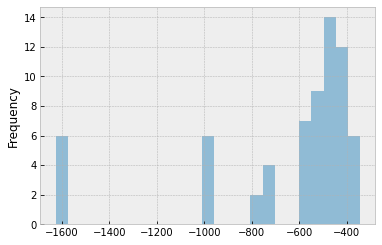

In [ ]:


plt.style.use('bmh')
df['solutionEnergy'].plot.hist(alpha=0.5,bins=25)

In [ ]:
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

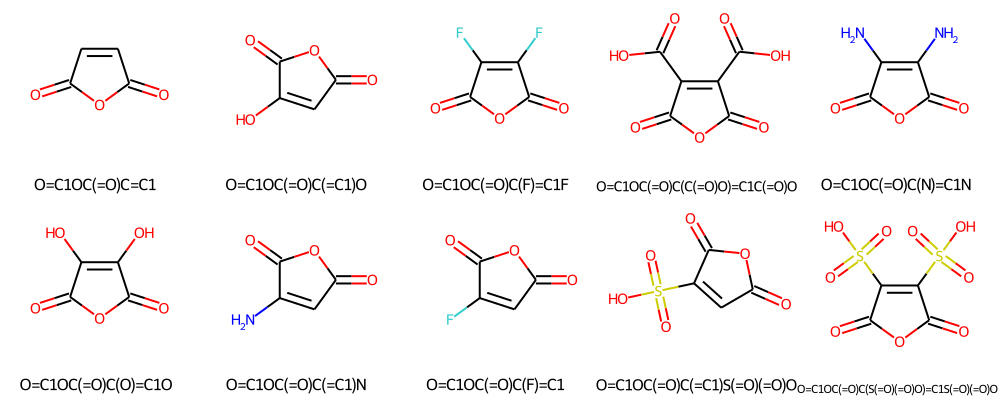

In [ ]:
mols = df['mol'][:10]
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['smiles'][:10].values))

In [ ]:
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))

In [ ]:
df.head()

,smiles,moleculerWeight,stoichiometry,stoichiometry.1,gasEnergy,solutionEnergy,gasHomo,solutionHomo,gasLumo,solutionLumo,mepcDipoleMomentsTot,mepcGasDipoleMomentsTot,mmcDipoleMomentsTot,mmcGasDipoleMomentsTot,mqmwDipoleMomentsTot,mqmwGasDipoleMomentsTot,alpha,beta,dalpha,cavityEnergy,molecularSurface,reactionFieldEnergy,solventAccessSurface,molecularPointGroup,nuclearRepulsionEnergy,pointGroupUsed,mol
0,O=C1OC(=O)C=C1,98.00,C4H2O3,NaN,-378.89918,-378.90921,-0.26305,-0.27345,-0.16095,-0.15824,5.6636,4.1934,6.5309,4.8997,5.7220,4.2348,54.743,31.140355,47.976,3.83641,107.77013,-13.72340,242.77736,C2v,272.515501,C2v,<rdkit.Chem.rdchem.Mol object at 0x7f80a2811990>
1,O=C1OC(=O)C(=C1)O,114.00,C4H2O4,OH,-454.06562,-454.07870,-0.26939,-0.26334,-0.14906,-0.14790,4.8360,3.4922,5.3261,3.9971,4.8799,3.5239,61.887,-123.638395,45.468,3.90021,112.71120,-16.66028,250.55044,C1,351.367559,C1,<rdkit.Chem.rdchem.Mol object at 0x7f80a27ca350>
2,O=C1OC(=O)C(F)=C1F,133.98,C4O3F2,F,-577.19143,-577.19630,-0.28622,-0.28677,-0.16921,-0.16499,2.7967,2.0391,1.0997,0.3263,2.8356,2.0698,58.411,-153.586284,51.959,4.03023,121.76391,-10.19075,266.39426,C2v,434.353303,C2v,<rdkit.Chem.rdchem.Mol object at 0x7f80a2a48120>
3,O=C1OC(=O)C(C(=O)O)=C1C(=O)O,185.98,C6H2O7,COOH,-755.67777,-755.69768,-0.27063,-0.27702,-0.21387,-0.20152,5.1939,3.3327,4.9663,3.2474,5.1945,3.3201,96.435,142.431481,35.721,4.38522,153.05979,-25.24181,309.64934,C1,789.447978,C1,<rdkit.Chem.rdchem.Mol object at 0x7f80a2814cb0>
4,O=C1OC(=O)C(N)=C1N,128.02,C4N2H4O3,NH2,-489.52053,-489.54624,-0.18974,-0.18290,-0.11376,-0.12295,9.7072,6.9753,11.3046,8.4212,9.7599,7.0068,84.474,-442.812317,73.732,4.08638,127.51153,-27.07350,273.23612,C2v,438.854193,C2v,<rdkit.Chem.rdchem.Mol object at 0x7f80a2824f80>


In [ ]:
df_n = df.loc[:, ['gasEnergy', 'solutionEnergy', 'mol']]

In [ ]:
df_n.head()

,gasEnergy,solutionEnergy,mol
0,-378.89918,-378.90921,<rdkit.Chem.rdchem.Mol object at 0x7f80a2811990>
1,-454.06562,-454.07870,<rdkit.Chem.rdchem.Mol object at 0x7f80a27ca350>
2,-577.19143,-577.19630,<rdkit.Chem.rdchem.Mol object at 0x7f80a2a48120>
3,-755.67777,-755.69768,<rdkit.Chem.rdchem.Mol object at 0x7f80a2814cb0>
4,-489.52053,-489.54624,<rdkit.Chem.rdchem.Mol object at 0x7f80a2824f80>


In [ ]:

def force_field_energy(mol,gen_3d=True, nconf=100):
  #cids = AllChem.EmbedMolecule(mol)
  #AllChem.MMFFOptimizeMolecule(mol)
  #pyMP = AllChem.MMFFGetMoleculeProperties(mol)
  #pyFF = AllChem.MMFFGetMoleculeForceField(mol, pyMP)
  #pyFF.Minimize()
  #energy = pyFF.CalcEnergy()
  #return energy*23.061
  if gen_3d:
        cids = AllChem.EmbedMultipleConfs(mol, nconf, AllChem.ETKDG())

        AllChem.MMFFSanitizeMolecule(mol)
        mmff_props = AllChem.MMFFGetMoleculeProperties(mol,mmffVariant='MMFF94s')

        energies = []
        for cid in cids:
            ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props, confId=cid)
            ff.Minimize()
            energy = ff.CalcEnergy()
            energies.append(energy)

        energies = np.asarray(energies)
        min_energy_idx = np.argsort(energies)[0]
  return energies[min_energy_idx]

In [ ]:
df['energy_mmff94s (kcal/mol)'] = df['mol'].apply(lambda x: force_field_energy(x))

In [ ]:
def force_field_energy(mol,gen_3d=True, nconf=100):
  
  if gen_3d:
        cids = AllChem.EmbedMultipleConfs(mol, nconf, AllChem.ETKDG())

        AllChem.MMFFSanitizeMolecule(mol)
        mmff_props = AllChem.MMFFGetMoleculeProperties(mol,mmffVariant='MMFF94')

        energies = []
        for cid in cids:
            ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props, confId=cid)
            ff.Minimize()
            energy = ff.CalcEnergy()
            energies.append(energy)

        energies = np.asarray(energies)
        min_energy_idx = np.argsort(energies)[0]
  return energies[min_energy_idx]

In [ ]:
df['energy_mmff94 (kcal/mol)'] = df['mol'].apply(lambda x: force_field_energy(x))

In [ ]:
def force_field_energy(mol,gen_3d=True, nconf=100):
  
  if gen_3d:
        cids = AllChem.EmbedMultipleConfs(mol, nconf, AllChem.ETKDG())

      

        energies = []
        for cid in cids:
          
           ffu = AllChem.UFFGetMoleculeForceField(mol)
           ffu.Minimize()
           energy = ffu.CalcEnergy()
           energies.append(energy)

        energies = np.asarray(energies)
        min_energy_idx = np.argsort(energies)[0]
  return energies[min_energy_idx]

In [ ]:
df['energy_uff (kcal/mol)'] = df['mol'].apply(lambda x: force_field_energy(x))

In [ ]:
df_n = df.loc[:, ['smiles','gasEnergy', 'solutionEnergy','energy_mmff94s (kcal/mol)','energy_mmff94 (kcal/mol)','energy_uff (kcal/mol)']]

In [ ]:
df_n.head()

,smiles,gasEnergy,solutionEnergy,energy_mmff94s (kcal/mol),energy_mmff94 (kcal/mol),energy_uff (kcal/mol)
0,O=C1OC(=O)C=C1,-378.89918,-378.90921,-37.581021,-37.581021,32.935890
1,O=C1OC(=O)C(=C1)O,-454.06562,-454.07870,-16.778336,-16.778336,34.723494
2,O=C1OC(=O)C(F)=C1F,-577.19143,-577.19630,-19.114471,-19.114471,35.275343
3,O=C1OC(=O)C(C(=O)O)=C1C(=O)O,-755.67777,-755.69768,-150.151961,-150.151961,43.373919
4,O=C1OC(=O)C(N)=C1N,-489.52053,-489.54624,65.653640,61.468078,38.317874


In [ ]:
-1003.49347+1003.51730	

0.02382999999997537

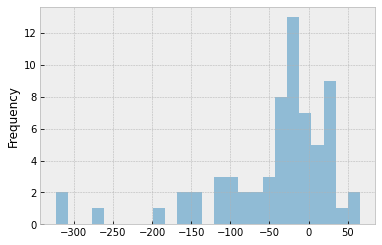

In [ ]:
plt.style.use('bmh')
df['energy_mmff94s (kcal/mol)'].plot.hist(alpha=0.5,bins=25)

In [ ]:
def smiles_to_rdkit(smi, gen_3d=True, nconf=100):
    """
    Convert smiles to RDKit molecule.
    Tries to generate the lowest-energy conformer.
    """
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)

    if gen_3d:
        cids = AllChem.EmbedMultipleConfs(mol, nconf, AllChem.ETKDG())

        AllChem.MMFFSanitizeMolecule(mol)
        mmff_props = AllChem.MMFFGetMoleculeProperties(mol)

        energies = []
        for cid in cids:
            ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props, confId=cid)
            ff.Minimize()
            energy = ff.CalcEnergy()
            energies.append(energy)

        energies = np.asarray(energies)
        min_energy_idx = np.argsort(energies)[0]

        new_mol = Chem.Mol(mol)
        new_mol.RemoveAllConformers()
        min_conf = mol.GetConformer(cids[min_energy_idx])
        new_mol.AddConformer(min_conf, assignId=True)
        mol = new_mol

    return mol

In [ ]:
smi = df['smiles'][4]
print(smi)
mol = Chem.MolFromSmiles(smi)

print(mol)
mol_h_UFF = Chem.AddHs(mol)
mol_h_MMFF = Chem.AddHs(mol)

num_of_conformer=100
max_iter=500
# Default values for min energy conformer
min_energy_UFF=10000
min_energy_index_UFF=0
min_energy_MMFF=10000
min_energy_index_MMFF=0

# Generate conformers (stored in side the mol object)
#cids = AllChem.EmbedMultipleConfs(mol_h, numConfs=num_of_conformer)
cids = AllChem.EmbedMultipleConfs(mol_h_UFF, numConfs=num_of_conformer,params=AllChem.ETKDG())
cids = AllChem.EmbedMultipleConfs(mol_h_MMFF, numConfs=num_of_conformer,params=AllChem.ETKDG())
ids = list(cids) #You can reach conformers by ids


results_UFF = AllChem.UFFOptimizeMoleculeConfs(mol_h_UFF,maxIters=max_iter)
results_MMFF = AllChem.MMFFOptimizeMoleculeConfs(mol_h_MMFF,maxIters=max_iter)


# Search for the min energy conformer from results(tuple(is_converged,energy))
print("Searching conformers by UFF ") 
for index, result in enumerate(results_UFF):
    if(min_energy_UFF>result[1]):       
        min_energy_UFF=result[1]
        min_energy_index_UFF=index
        print(min_energy_index_UFF,":",min_energy_UFF)      
print("\nSearching conformers by MMFF ")   
for index, result in enumerate(results_MMFF):
    if(min_energy_MMFF>result[1]):       
        min_energy_MMFF=result[1]
        min_energy_index_MMFF=index
        print(min_energy_index_MMFF,":",min_energy_MMFF)


O=C1OC(=O)C(N)=C1N
Searching conformers by UFF 
0 : 38.31788042626465
3 : 38.317880425328774
4 : 38.317880424616774
5 : 38.31788042208428
14 : 38.31788042149204
19 : 38.317880420004926
30 : 38.31788041984954

Searching conformers by MMFF 
0 : 63.43312279910797
1 : 63.43312273549573
3 : 63.433122732830896
11 : 61.46807784307208
14 : 61.46807782331179
17 : 61.468077817682726
21 : 61.46807781131696
28 : 61.468077807134605


In [ ]:
smi = df['smiles'][4]
print(smi)
mol = Chem.MolFromSmiles(smi)

print(mol)
mol = Chem.AddHs(mol)
cids = AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)
pyMP = AllChem.MMFFGetMoleculeProperties(mol)
pyFF = AllChem.MMFFGetMoleculeForceField(mol, pyMP)
pyFF.Minimize()
energy = pyFF.CalcEnergy()
  #return energy*23.061
print(pyFF.CalcEnergy())
#grad = pyFF.CalcGradient()   # This is not a defined method.


O=C1OC(=O)C(N)=C1N
63.433122729835205


In [ ]:
for atom in mol.GetAtoms():
      if not atom.GetAtomicNum() == 1:
           idx = atom.GetIdx()
           pyFF.MMFFAddPositionConstraint(idx, maxDispl=0.5, forceConstant=100)
pyFF.Minimize(maxIts=10000)
pyFF.CalcEnergy()
# this gives the energy after applying a moderate restraint (100 kcal/mol, with a maximum displacement of 0.5 A).

63.433122728435606

In [ ]:
m = Chem.MolFromSmiles('O=C1OC(=O)C(N)=C1N')
m2=Chem.AddHs(m)
#AllChem.EmbedMolecule(m2)
AllChem.EmbedMultipleConfs(m2)
AllChem.MMFFOptimizeMolecule(m2)
pyMP = AllChem.MMFFGetMoleculeProperties(m2)
pyFF = AllChem.MMFFGetMoleculeForceField(m2, pyMP)
print(pyFF.CalcEnergy())
pyMP.GetMMFFVdWParams(0,1)

61.46807782685189


(3.776022662991262,
 0.06563579928600445,
 3.776022662991262,
 0.06563579928600445)

In [ ]:
atorvastatin_smiles = 'O=C1OC(=O)C(N)=C1N'
atorvastatin = Chem.MolFromSmiles(atorvastatin_smiles) # Atorvastatin (aka Lipitor) is one of the world's best-selling drugs.

fingerprint = GetMorganFingerprintAsBitVect(atorvastatin, radius=2, nBits=2048)

fp_array = np.zeros((1, ))
ConvertToNumpyArray(fingerprint, fp_array)

print(fp_array)
# [0. 1. 0. ... 0. 0. 0.]

print(fp_array.shape)
# (2048,)

[0. 0. 0. ... 0. 0. 0.]
(2048,)


In [ ]:
def smiles_to_rdkit(smi, gen_3d=True, nconf=100):
    """
    Convert smiles to RDKit molecule.
    Tries to generate the lowest-energy conformer.
    """
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)

    if gen_3d:
        cids = AllChem.EmbedMultipleConfs(mol, nconf, AllChem.ETKDG())

        AllChem.MMFFSanitizeMolecule(mol)
        mmff_props = AllChem.MMFFGetMoleculeProperties(mol)

        energies = []
        for cid in cids:
            ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props, confId=cid)
            ff.Minimize()
            energy = ff.CalcEnergy()
            energies.append(energy)

        energies = np.asarray(energies)
        min_energy_idx = np.argsort(energies)[0]

        new_mol = Chem.Mol(mol)
        new_mol.RemoveAllConformers()
        min_conf = mol.GetConformer(cids[min_energy_idx])
        new_mol.AddConformer(min_conf, assignId=True)
        mol = new_mol

    return mol